In [3]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

### F1-Score的基本性质

In [4]:
def harmonic_mean(A, B):
        return 2 * A * B/(A + B)

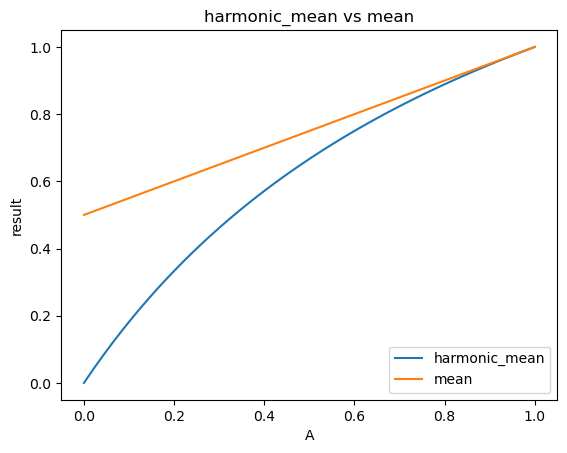

In [5]:
A = np.linspace(0, 1, 100)
B = np.ones(shape = A.shape)

plt.plot(A, harmonic_mean(A, B), label = 'harmonic_mean')
plt.plot(A, (A+B)/2, label = 'mean')
plt.xlabel('A')
plt.ylabel('result')
plt.title('harmonic_mean vs mean')
plt.legend(loc = 4)

### ROC-AUC的基本性质

In [7]:
# 定义阈值取值范围
thr_l = np.linspace(1, 0, 100)

In [8]:
# 输入两个模型预测结果和数据真实标签
yhat_A = np.array([0.9, 0.8, 0.6, 0.4, 0.3]).reshape(-1, 1)
y_A = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)
yhat_B = np.array([0.9, 0.8, 0.6, 0.4, 0.3]).reshape(-1, 1)
y_B = np.array([1, 0, 1, 1, 0]).reshape(-1, 1)

In [9]:
# TPR计算过程
y_cla = logit_cla(yhat_A, thr=0.5)
P = y_cla[y_A == 1]
TPR = P.mean()
TPR

np.float64(0.6666666666666666)

In [10]:
logit_cla(yhat_A, thr=0.5)

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [11]:
y_A

array([[1],
       [1],
       [0],
       [1],
       [0]])

In [12]:
[y_A == 1]

[array([[ True],
        [ True],
        [False],
        [ True],
        [False]])]

In [13]:
logit_cla(yhat_A, thr=0.5)[y_A == 1].mean()

np.float64(0.6666666666666666)

In [14]:
# FPR计算过程
N = y_cla[y_A == 0]
FPR = N.mean()
FPR

np.float64(0.5)

In [15]:
y_cla = logit_cla(yhat_A, thr=0.5)
y_cla

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.]])

In [16]:
y_A

array([[1],
       [1],
       [0],
       [1],
       [0]])

In [17]:
[y_A == 0]

[array([[False],
        [False],
        [ True],
        [False],
        [ True]])]

In [18]:
y_cla[y_A == 0].mean()

np.float64(0.5)

In [19]:
# 定义ROC曲线绘制函数
def ROC_curve(yhat, y, thr_l, label='ROC_curve'):
    """
    ROC绘制曲线函数：
    :param yhat: 模型输出的类别概率判别结果
    :param y: 样本真实类别
    :param thr_l：阈值取值列表
    :param label：折线图的图例
    :return ：ROC曲线绘制图
    """
    TPR_l = []
    FPR_l = []
    for i in thr_l:
        y_cla = logit_cla(yhat, thr=i)
        P = y_cla[y == 1]
        TPR = P.mean()
        TPR_l.append(TPR)
        N = y_cla[y == 0]
        FPR = N.mean()
        FPR_l.append(FPR)
    plt.plot(FPR_l, TPR_l, label=label)

In [20]:
thr_l

array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
       0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
       0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
       0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
       0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
       0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
       0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
       0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
       0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
       0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
       0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
       0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
       0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
       0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
       0.29292929, 0.28282828, 0.27272727, 0.26262626, 0.25252

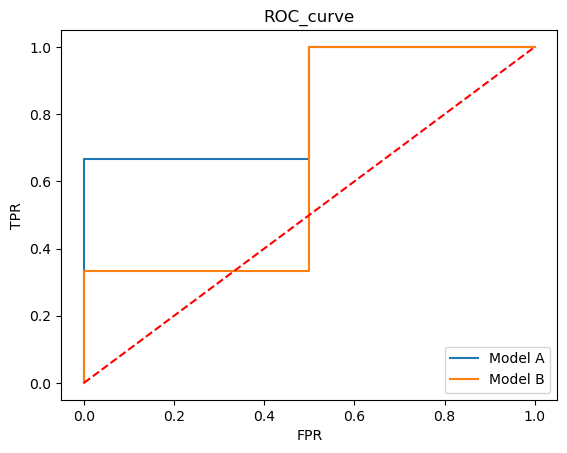

In [21]:
# 绘制ROC曲线
ROC_curve(yhat_A, y_A, thr_l, label='Model A')
ROC_curve(yhat_B, y_B, thr_l, label='Model B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

### 之前的逻辑回归预测结果进行绘制

In [22]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
f, l = arrayGenCla(num_class = 2, deg_dispersion = [4, 2], bias = True)          # 离散程度较小

# 数据归一化处理
mean_ = f[:, :-1].mean(axis=0)
std_ = f[:, :-1].std(axis=0)

f[:, :-1] = (f[:, :-1] - mean_) / std_

In [24]:
# 设置随机数种子
np.random.seed(24)

# 核心参数
batch_size = 50
num_epoch = 200
lr_init = 0.2

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)

lr_lambda = lambda epoch: 0.95 ** epoch

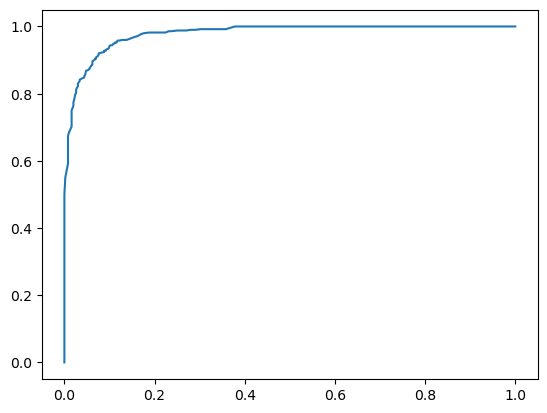

In [ ]:
# 模型训练
for i in range(num_epoch):
    w = sgd_cal(f, w, l, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))

# 输出概率结果
yhat = sigmoid(f.dot(w))

# 绘制ROC曲线图
ROC_curve(yhat, l, thr_l)

### 极端情况

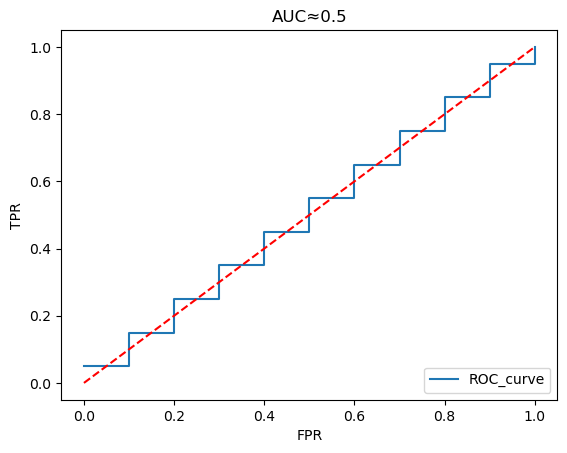

In [33]:
y = np.array([1, 0, 0, 1]*10).reshape(-1, 1)
y_hat = np.linspace(0, 1, 40).reshape(-1, 1)

ROC_curve(yhat=y_hat, y=y, thr_l=thr_l)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC≈0.5')
plt.legend(loc = 4)

### 极端情况2

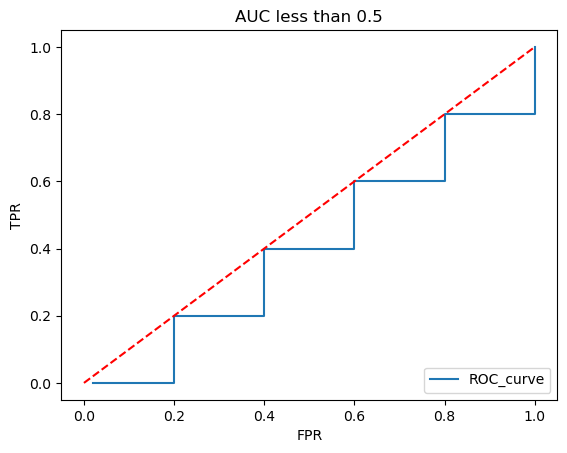

In [35]:
y = np.array(([0]*10 + [1]*10) * 5).reshape(-1, 1)
y_hat = np.linspace(1, 0, 100).reshape(-1, 1)

ROC_curve(yhat=y_hat, y=y, thr_l=thr_l)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC less than 0.5')
plt.legend(loc = 4)

### ROC的概率敏感特性

In [36]:
yhat = np.array([0.9, 0.8, 0.7, 0.6, 0.51, 0.4, 0.3, 0.2, 0.1, 0.01]).reshape(-1, 1)

In [38]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [39]:
y_A = np.eye(10)[:,1:2]
y_A

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [40]:
y_B = np.eye(10)[:,3:4]
y_B

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

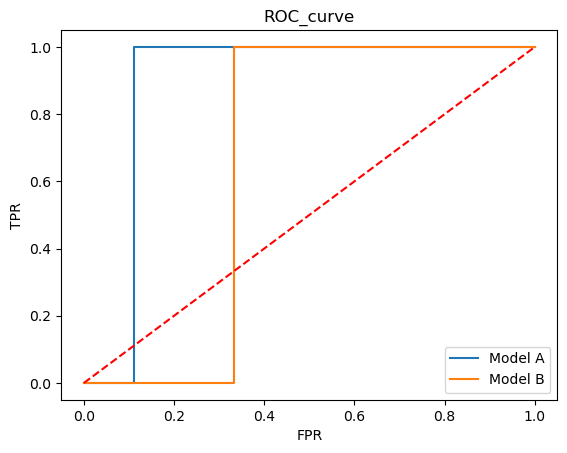

In [41]:
ROC_curve(yhat, y_A, thr_l, label='Model A')
ROC_curve(yhat, y_B, thr_l, label='Model B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

### ROC排序敏感

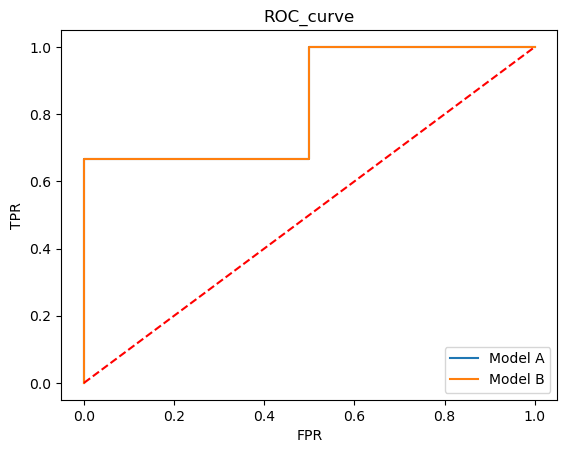

In [42]:
# 定义阈值取值范围
thr_l = np.linspace(1, 0, 100)

# 输入两个模型预测结果和数据真实标签
yhat_A = np.array([0.9, 0.8, 0.56, 0.4, 0.3]).reshape(-1, 1)
y_A = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)
yhat_B = np.array([0.7, 0.6, 0.56, 0.4, 0.3]).reshape(-1, 1)
y_B = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)

# 绘制ROC曲线
ROC_curve(yhat_A, y_A, thr_l, label='Model A')
ROC_curve(yhat_B, y_B, thr_l, label='Model B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

### ROC 类别对称性

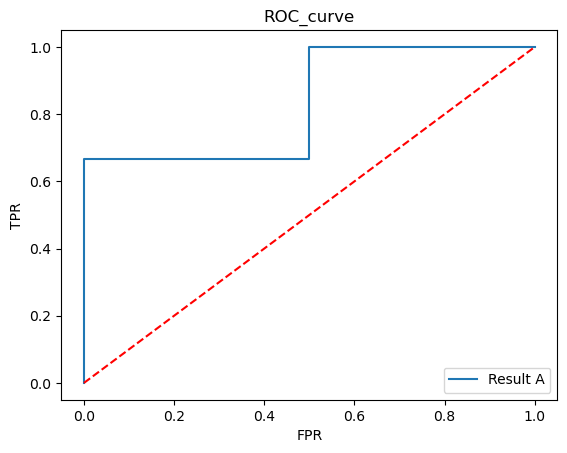

In [43]:
# 定义阈值取值范围
thr_l = np.linspace(1, 0, 100)

# 输入结果A
yhat_A = np.array([0.9, 0.8, 0.6, 0.4, 0.3]).reshape(-1, 1)
y_A = np.array([1, 1, 0, 1, 0]).reshape(-1, 1)

# 绘制ROC曲线
ROC_curve(yhat_A, y_A, thr_l, label='Result A')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')
plt.legend(loc = 4)

Text(0.5, 1.0, 'ROC_curve')

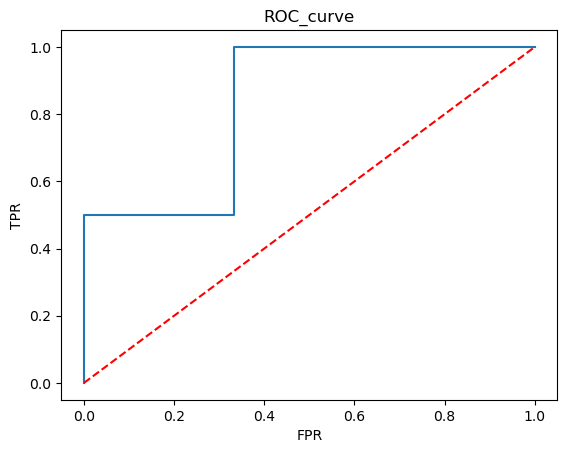

In [44]:
# 输入结果B
yhat_B = np.array([0.7, 0.6, 0.4, 0.2, 0.1]).reshape(-1, 1)
y_B = np.array([1, 0, 1, 0, 0]).reshape(-1, 1)

# 绘制ROC曲线
ROC_curve(yhat_B, y_B, thr_l, label='Result B')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC_curve')

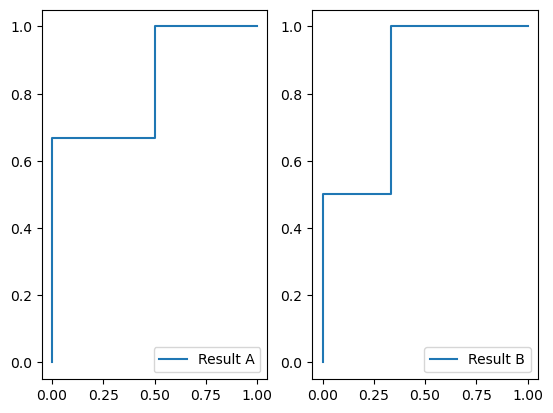

In [45]:
plt.subplot(121)
ROC_curve(yhat_A, y_A, thr_l, label='Result A')
plt.legend(loc = 4)
plt.subplot(122)
ROC_curve(yhat_B, y_B, thr_l, label='Result B')
plt.legend(loc = 4)